In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

print(diabetes.data.shape)
X = diabetes.data
y = diabetes.target


(442, 10)


In [46]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

In [47]:
def pca(X, n_components):
    
    cov_matrix = np.cov(X, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1] #descending order
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    principal_components = sorted_eigenvectors[:, :n_components]
    projected_data = np.dot(X, principal_components)
    
    return projected_data, principal_components, sorted_eigenvalues

In [48]:
n_components = 5  
projected_data, principal_components, sorted_eigenvalues = pca(X_normalized, n_components)


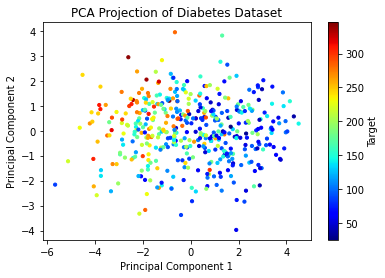

In [49]:
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c=y, cmap='jet', s=10)
plt.colorbar(scatter, label='Target')
plt.title('PCA Projection of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

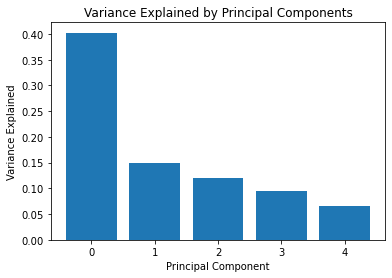

In [50]:
plt.bar(np.arange(n_components), sorted_eigenvalues[:n_components] / np.sum(sorted_eigenvalues))
plt.title('Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [51]:
projected_data

array([[-0.58720767,  1.94682793, -0.58923299,  0.0828117 , -0.25662966],
       [ 2.83161209, -1.37208454, -0.02791506,  0.46999935, -0.14322912],
       [-0.27214757,  1.63489803, -0.73927034,  0.79147497, -1.16382139],
       ...,
       [ 0.20524634,  1.20544647, -0.4960784 ,  1.35334928, -0.14168624],
       [-0.69286627, -0.21011694,  0.86872976, -1.61678966,  0.11964918],
       [ 1.90393365, -3.97577106,  0.04838108,  0.22061154,  0.5998239 ]])

In [52]:
principal_components

array([[-0.21643101, -0.04437151, -0.49466811,  0.4140095 , -0.68686389],
       [-0.18696711,  0.38654811,  0.10685833,  0.67986052,  0.37345612],
       [-0.3031625 ,  0.15628061, -0.1675317 , -0.49982533,  0.12935936],
       [-0.2717397 ,  0.13825564, -0.51356804,  0.01966734,  0.48689014],
       [-0.34325493, -0.57302669,  0.0685867 ,  0.06839533,  0.12917415],
       [-0.35186062, -0.45593985,  0.26969438,  0.16777384,  0.11673143],
       [ 0.28243639, -0.50624287, -0.38602787,  0.07602005,  0.24499115],
       [-0.42883325,  0.06818423,  0.38068121, -0.0079212 , -0.14364377],
       [-0.37861731,  0.0261893 , -0.0636315 , -0.26442742, -0.1516611 ],
       [-0.32218282,  0.0849466 , -0.27684271, -0.08708624,  0.03138792]])